# Unsupervised learning with a Graph-convolutional auto-encoder: Parametrisation study

This is meant to run on the `grunch` machine, with access to the LIP NFS filesystem (in particular `/datastore`).

In [ ]:
%%bash
cd /warehouse/COMPLEXNET/jlevyabi/nw2vec
~/seacabo/geoanaconda/anaconda3/envs/myenv/bin/python sensitivity_analysis.py

In [3]:
import pickle
import pandas as pd
import numpy as np
new_results_no_bias=pickle.load(open("/warehouse/COMPLEXNET/jlevyabi/nw2vec/no_bias10_comm_10_npc_vae_sens_analysis.p",
                                   "rb"))

data_no_bias=[]
for model_name,dic_data in new_results_no_bias.items():
        for history_data,q_model_data in zip(dic_data["history"],dic_data["q_pred"]):
                _,bias,_,_,p_out,_,_,dim_ξ,_,_,dim_l1,_,_,_,n_ξ_samples=model_name.split("_")
                loss,q_mulogDu_flat_loss,model_2_loss=history_data.history.values()
                data_no_bias.append((int(bias),float(p_out),int(dim_ξ),int(dim_l1),int(n_ξ_samples),
                np.min(loss),np.min(q_mulogDu_flat_loss),np.min(model_2_loss)))

df_data_no_bias=pd.DataFrame(data_no_bias,columns=["bias","p_out","dim_ξ","dim_l1","n_ξ_samples",
                                                   "loss","q_mulogDu_flat_loss","model_2_loss"])

new_results_bias=pickle.load(open("/warehouse/COMPLEXNET/jlevyabi/nw2vec/yes_bias10_comm_10_npc_vae_sens_analysis.p",
                                   "rb"))

data_bias=[]
for model_name,dic_data in new_results_bias.items():
        for history_data,q_model_data in zip(dic_data["history"],dic_data["q_pred"]):
                _,bias,_,_,p_out,_,_,dim_ξ,_,_,dim_l1,_,_,_,n_ξ_samples=model_name.split("_")
                loss,q_mulogDu_flat_loss,model_2_loss=history_data.history.values()
                data_bias.append((int(bias),float(p_out),int(dim_ξ),int(dim_l1),int(n_ξ_samples),
                np.min(loss),np.min(q_mulogDu_flat_loss),np.min(model_2_loss)))

df_data_bias=pd.DataFrame(data_bias,columns=["bias","p_out","dim_ξ","dim_l1","n_ξ_samples",
                                       "loss","q_mulogDu_flat_loss","model_2_loss"])

/home/jlevyabi/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)


In [5]:
result = pd.concat([df_data_no_bias, df_data_bias], ignore_index=True)
dec=["<2","2-6","10"]
result_dec_size=[]
for x,y in result[["dim_ξ","dim_l1"]].values:
    res=(y+0.0)/x
    if res<2:
        result_dec_size.append(dec[0])
    elif res>=10:
        result_dec_size.append(dec[-1])
    else:
        result_dec_size.append(dec[1])

result["dim_l1/dim_ξ"]=result_dec_size

/home/jlevyabi/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:482: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


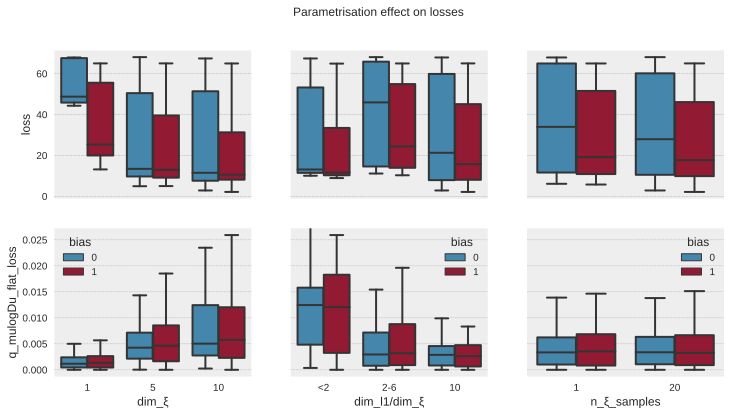

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'svg' 
plt.style.use('bmh');
f,axes=plt.subplots(2,3,figsize=(12,6));
plt.suptitle("Parametrisation effect on losses");

g00 = sns.boxplot(x="dim_ξ", y="loss",hue="bias",
                   data=result,
                   showfliers=False,ax=axes[0,0]);
plt.setp(axes[0,0].get_xticklabels(), visible=False);
g00.set_xlabel("");
axes[0,0].legend_.remove();


g01 = sns.boxplot(x="dim_l1/dim_ξ", y="loss",hue="bias",
                   data=result,order=dec,
                   showfliers=False,ax=axes[0,1]);
plt.setp(axes[0,1].get_xticklabels(), visible=False);
g01.set_xlabel("");
plt.setp(axes[0,1].get_yticklabels(), visible=False);
g01.set_ylabel("");
g01.set_ylim(g00.get_ylim());
axes[0,1].legend_.remove();


g02 = sns.boxplot(x="n_ξ_samples", y="loss",hue="bias",
                   data=result,
                   showfliers=False,ax=axes[0,2]);
plt.setp(axes[0,2].get_xticklabels(), visible=False);
g02.set_xlabel("");
plt.setp(axes[0,2].get_yticklabels(), visible=False);
g02.set_ylabel("");
g02.set_ylim(g00.get_ylim());
axes[0,2].legend_.remove();

g10 = sns.boxplot(x="dim_ξ", y="q_mulogDu_flat_loss",hue="bias",
                   data=result,
                   showfliers=False,ax=axes[1,0]);

g11 = sns.boxplot(x="dim_l1/dim_ξ", y="q_mulogDu_flat_loss",hue="bias",
                   data=result,order=dec,
                   showfliers=False,ax=axes[1,1]);
plt.setp(axes[1,1].get_yticklabels(), visible=False);
g11.set_ylabel("");
g11.set_ylim(g10.get_ylim());


g12 = sns.boxplot(x="n_ξ_samples", y="q_mulogDu_flat_loss",hue="bias",
                   data=result,
                   showfliers=False,ax=axes[1,2]);
plt.setp(axes[1,2].get_yticklabels(), visible=False);
g12.set_ylim(g10.get_ylim());
g12.set_ylabel("");



In [14]:
result.head()

,bias,p_out,dim_ξ,dim_l1,n_ξ_samples,loss,q_mulogDu_flat_loss,model_2_loss,dim_l1/dim_ξ
0,0,0.000001,1,6,1,44.814419,0.001537,-3.755837,2-6
1,0,0.000001,1,6,1,NaN,NaN,0.393326,2-6
2,0,0.000001,1,6,1,48.829250,0.002073,-3.554935,2-6
3,0,0.000001,1,6,1,67.653824,0.001581,-4.384365,2-6
4,0,0.000001,1,6,1,47.588966,0.005002,-3.201602,2-6


In [12]:
# Take the best performing set of parameters among the ones tested
best_dim_ξ=10
best_dim_l1_dim_ξ="10"
bias=1
best_params_res=result[(result["dim_ξ"]==best_dim_ξ) & 
                       (result["dim_l1/dim_ξ"]==best_dim_l1_dim_ξ) &
                      (result["bias"]==1)].drop(["dim_ξ","dim_l1/dim_ξ","dim_l1",
                                                 "n_ξ_samples","bias","dim_l1_wrt_dim_ξ"],axis=1)

In [43]:
mean_data=(best_params_res.groupby(['p_out', ])['q_mulogDu_flat_loss','loss'].mean()).reset_index()
std_data=(best_params_res.groupby(['p_out', ])['q_mulogDu_flat_loss','loss'].std()).reset_index()

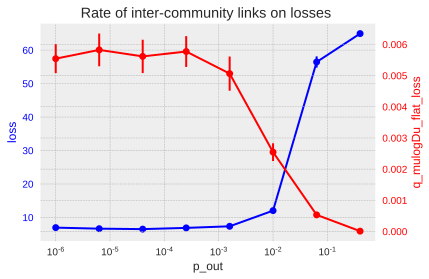

In [47]:
# See effect of rate of intercommunity links on losses
from math import sqrt
results_netw=pd.merge(mean_data,std_data,on="p_out",suffixes=("_mean","_std"))

nb_rep=6
f,ax1=plt.subplots(1,1)
ax1.errorbar(results_netw["p_out"], results_netw["loss_mean"],
             yerr=results_netw["loss_std"]/sqrt(nb_rep), fmt='o-',color="b")
ax1.tick_params('y', colors='b')
ax1.set_ylabel('loss', color='b')

ax2 = ax1.twinx()

ax2.errorbar(results_netw["p_out"], results_netw["q_mulogDu_flat_loss_mean"],
             yerr=results_netw["q_mulogDu_flat_loss_std"]/sqrt(nb_rep), fmt='o-',color="r")
ax2.tick_params('y', colors='r')
ax2.set_ylabel('q_mulogDu_flat_loss', color='r')

plt.xscale("log")
ax1.set_xlabel("p_out")
plt.title("Rate of inter-community links on losses ")
plt.show()